In [1]:
import pandas as pd
df=pd.read_csv('bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         100 non-null    object
 1   marital     100 non-null    object
 2   education   100 non-null    object
 3   housing     100 non-null    object
 4   loan        100 non-null    object
 5   contact     100 non-null    object
 6   poutcome    100 non-null    object
 7   subscribed  100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [2]:
from sklearn.preprocessing import LabelEncoder

le_job=LabelEncoder()
le_marital=LabelEncoder()
le_education=LabelEncoder()
le_contact=LabelEncoder()
le_poutcome=LabelEncoder()
le_yes_no=LabelEncoder()

le_yes_no.fit(['yes','no'])

df['job_num']=le_job.fit_transform(df['job'])
df['marital_num']=le_marital.fit_transform(df['marital'])
df['education_num']=le_education.fit_transform(df['education'])

df['housing_num']=le_yes_no.transform(df['housing'])
df['loan_num']=le_yes_no.transform(df['loan'])

df['contact_num']=le_contact.fit_transform(df['contact'])
df['poutcome_num']=le_poutcome.fit_transform(df['poutcome'])

df['subscribed_num']=le_yes_no.transform(df['subscribed'])

df


,job,marital,education,housing,loan,contact,poutcome,subscribed,job_num,marital_num,education_num,housing_num,loan_num,contact_num,poutcome_num,subscribed_num
0,blue-collar,married,secondary,no,no,unknown,unknown,no,1,1,1,0,0,2,3,0
1,blue-collar,married,secondary,no,no,cellular,unknown,no,1,1,1,0,0,0,3,0
2,blue-collar,married,unknown,yes,no,unknown,unknown,no,1,1,3,1,0,2,3,0
3,self-employed,married,tertiary,no,no,cellular,unknown,no,6,1,2,0,0,0,3,0
4,technician,married,secondary,no,no,cellular,unknown,no,9,1,1,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blue-collar,single,secondary,yes,no,cellular,unknown,yes,1,2,1,1,0,0,3,1
96,blue-collar,married,primary,yes,no,cellular,failure,no,1,1,0,1,0,0,0,0
97,admin.,married,secondary,yes,yes,cellular,unknown,no,0,1,1,1,1,0,3,0
98,blue-collar,divorced,primary,yes,no,cellular,unknown,no,1,0,0,1,0,0,3,0


In [3]:
dfCorr=df.corr(method='pearson')
print(dfCorr['subscribed_num'])

job_num           0.199343
marital_num       0.208831
education_num     0.111860
housing_num      -0.117185
loan_num         -0.141846
contact_num      -0.189402
poutcome_num     -0.258902
subscribed_num    1.000000
Name: subscribed_num, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_19068\3852946170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr=df.corr(method='pearson')


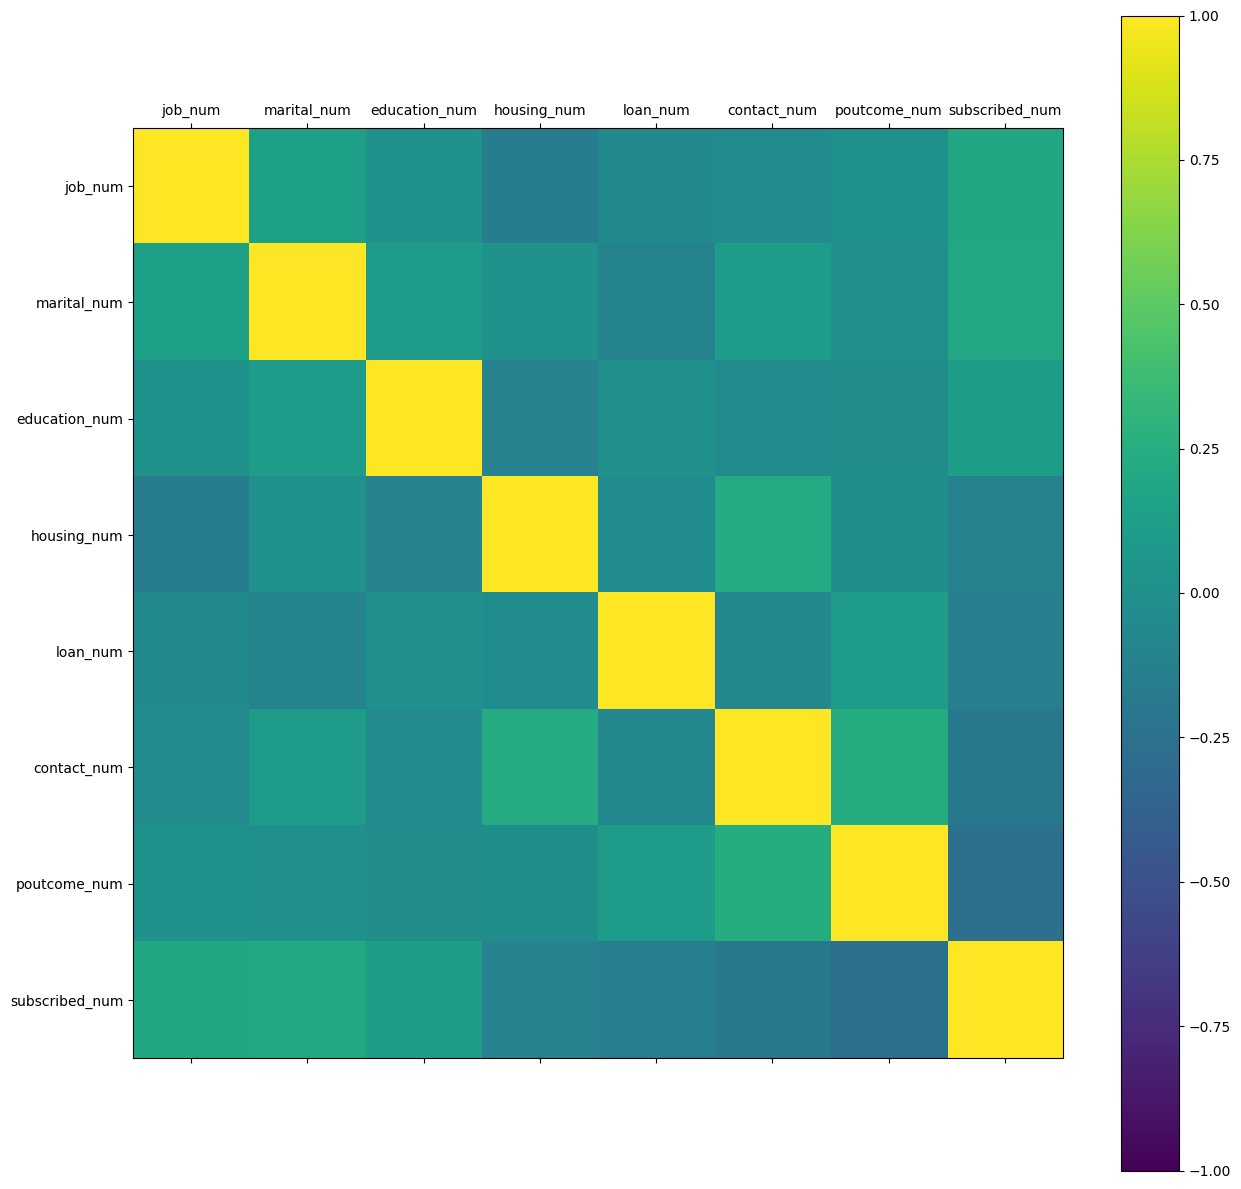

In [4]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(1,1,1)
cax=ax.matshow(dfCorr,vmin=-1,vmax=1)
fig.colorbar(cax)

ticks=[0,1,2,3,4,5,6,7]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num','subscribed_num'])
ax.set_yticklabels(['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num','subscribed_num'])

plt.show()

In [5]:
X=df[['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num']]
y=df['subscribed_num']

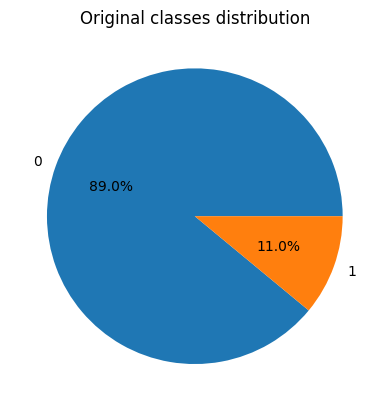

In [6]:

count=y.value_counts()
plt.title('Original classes distribution')

plt.pie(count,labels=count.index.to_list(),autopct='%1.1f%%')
plt.show()

In [7]:
from sklearn.utils import resample
print(len(X))
df_0=df[df['subscribed_num']==0]
df_1=df[df['subscribed_num']==1]

df_1_resampled=resample(df_1,n_samples=df_0['subscribed_num'].count())

df_resampled=pd.concat([df_0,df_1_resampled])


100


In [8]:
X=df_resampled[['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num']]
y=df_resampled['subscribed_num']
print(len(X))

178


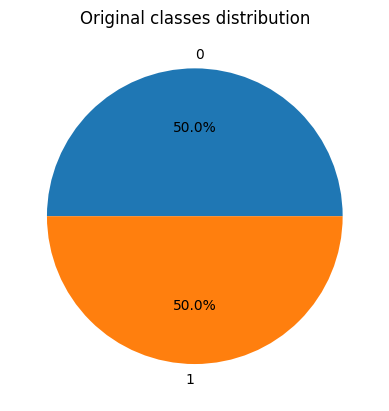

In [9]:
count=y.value_counts()
plt.title('Original classes distribution')

plt.pie(count,labels=count.index.to_list(),autopct='%1.1f%%')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
from sklearn.naive_bayes import CategoricalNB

model=CategoricalNB()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy',(accuracy_score(y_test,y_pred)).round(2))
print('Precision',(precision_score(y_test,y_pred)).round(2))
print('Recall_score',(recall_score(y_test,y_pred)).round(2))
print('F1',(f1_score(y_test,y_pred)).round(2))

Accuracy 0.81
Precision 0.82
Recall_score 0.78
F1 0.8


[[15  3]
 [ 4 14]]


<AxesSubplot: >

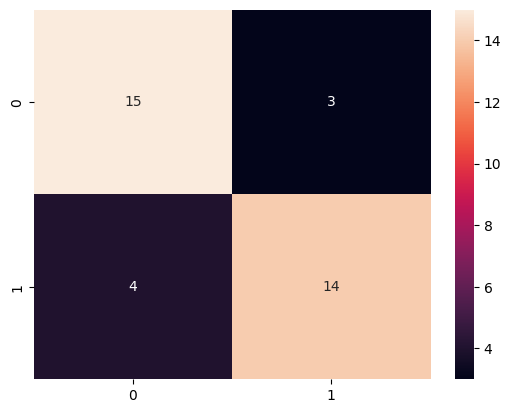

In [18]:
from sklearn.metrics import confusion_matrix

c_m=confusion_matrix(y_pred=y_pred,y_true=y_test)
print(c_m)
import seaborn as sns

sns.heatmap(c_m,annot=True)

In [25]:
newExample = ['student','married','primary','no','yes','telephone','failure']

job=le_job.transform([newExample[0]])[0]
marital=le_marital.transform([newExample[1]])[0]
education=le_education.transform([newExample[2]])[0]
housing=le_yes_no.transform([newExample[3]])[0]
loan=le_yes_no.transform([newExample[4]])[0]
contact=le_contact.transform([newExample[5]])[0]
poutcome=le_poutcome.transform([newExample[6]])[0]

ex_num=[[job,marital,education,housing,loan,contact,poutcome]]
ex_num_info=pd.DataFrame(ex_num,columns=['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num'])

print(le_yes_no.inverse_transform(model.predict(ex_num_info)))


['yes']
